In [1]:
%matplotlib inline

from pandas import *
import pandas
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def side_by_side(*objs, **kwds):
    from pandas.io.formats.printing import adjoin
    space = kwds.get('space', 4)
    reprs = [repr(obj).split('\n') for obj in objs]
    print adjoin(space, *reprs)
    
plt.rc('figure', figsize=(10,6))

In [3]:
labels = ['a', 'b', 'c', 'd', 'e']
s = Series(np.random.randn(5), index=labels)
s

a   -1.280625
b   -0.563342
c    1.371992
d    0.903311
e    0.199028
dtype: float64

In [4]:
'b' in s

True

In [5]:
s['b']

-0.56334218493046517

In [6]:
s.index

Index([u'a', u'b', u'c', u'd', u'e'], dtype='object')

In [7]:
mapping = s.to_dict()
mapping

{'a': -1.2806248599140777,
 'b': -0.5633421849304652,
 'c': 1.3719923798640863,
 'd': 0.9033110572122331,
 'e': 0.19902848684917948}

In [8]:
s = Series(mapping, index=['b', 'e', 'a', 'd', 'f'])
s

b   -0.563342
e    0.199028
a   -1.280625
d    0.903311
f         NaN
dtype: float64

In [9]:
s[isnull(s)]

f   NaN
dtype: float64

In [10]:
s[notnull(s)]

b   -0.563342
e    0.199028
a   -1.280625
d    0.903311
dtype: float64

In [11]:
s.dropna()

b   -0.563342
e    0.199028
a   -1.280625
d    0.903311
dtype: float64

In [12]:
s[:3]

b   -0.563342
e    0.199028
a   -1.280625
dtype: float64

In [13]:
s * 2

b   -1.126684
e    0.398057
a   -2.561250
d    1.806622
f         NaN
dtype: float64

In [14]:
s

b   -0.563342
e    0.199028
a   -1.280625
d    0.903311
f         NaN
dtype: float64

In [15]:
df = DataFrame( {'a': np.random.randn(6),
                 'b': ['foo', 'bar'] * 3,
                 'c': np.random.randn(6)} )
df

,a,b,c
0,1.193595,foo,1.814124
1,-0.988342,bar,-0.756099
2,0.859137,foo,0.365264
3,2.710530,bar,-0.101532
4,-1.759139,foo,1.451112
5,0.784652,bar,-1.981906


In [16]:
df['d'] = range(6)
df

,a,b,c,d
0,1.193595,foo,1.814124,0
1,-0.988342,bar,-0.756099,1
2,0.859137,foo,0.365264,2
3,2.710530,bar,-0.101532,3
4,-1.759139,foo,1.451112,4
5,0.784652,bar,-1.981906,5


In [17]:
df['b']

0    foo
1    bar
2    foo
3    bar
4    foo
5    bar
Name: b, dtype: object

In [18]:
df[:3]

,a,b,c,d
0,1.193595,foo,1.814124,0
1,-0.988342,bar,-0.756099,1
2,0.859137,foo,0.365264,2


In [19]:
df[-2:]

,a,b,c,d
4,-1.759139,foo,1.451112,4
5,0.784652,bar,-1.981906,5


In [20]:
np.tile(['foo', 'bar'], 3)

array(['foo', 'bar', 'foo', 'bar', 'foo', 'bar'],
      dtype='|S3')

In [21]:
df.xs(0)

a    1.19359
b        foo
c    1.81412
d          0
Name: 0, dtype: object

In [22]:
df.index

RangeIndex(start=0, stop=6, step=1)

In [23]:
df.loc[0]

a    1.19359
b        foo
c    1.81412
d          0
Name: 0, dtype: object

In [24]:
df.loc[2]

a    0.859137
b         foo
c    0.365264
d           2
Name: 2, dtype: object

In [25]:
df.loc[2, 'b']

'foo'

In [26]:
df.at[2, 'b']

'foo'

In [27]:
timeit df.loc[2, 'b']

The slowest run took 11.08 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 7.49 µs per loop


In [28]:
timeit df.at[2, 'b']

The slowest run took 8.94 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 4.83 µs per loop


In [29]:
df.loc[2:4, 'b']

2    foo
3    bar
4    foo
Name: b, dtype: object

In [30]:
df.loc[2:4, ['b', 'c']]

,b,c
2,foo,0.365264
3,bar,-0.101532
4,foo,1.451112


In [31]:
df.loc[2:4, 'b':'c']

,b,c
2,foo,0.365264
3,bar,-0.101532
4,foo,1.451112


In [32]:
df.loc[2:4, 'c':'b']

""
2
3
4


In [33]:
df.loc[[0,2,4], ['b','c','d']]

,b,c,d
0,foo,1.814124,0
2,foo,0.365264,2
4,foo,1.451112,4


In [34]:
df['c'] > 0

0     True
1    False
2     True
3    False
4     True
5    False
Name: c, dtype: bool

In [35]:
df.loc[ df['c'] > 0 ]

,a,b,c,d
0,1.193595,foo,1.814124,0
2,0.859137,foo,0.365264,2
4,-1.759139,foo,1.451112,4


In [36]:
df[ df['c'] > 0 ]

,a,b,c,d
0,1.193595,foo,1.814124,0
2,0.859137,foo,0.365264,2
4,-1.759139,foo,1.451112,4


In [37]:
df.columns

Index([u'a', u'b', u'c', u'd'], dtype='object')

In [38]:
df = DataFrame( {'a': np.random.randn(6),
                 'b': ['foo', 'bar'] * 3,
                 'c': np.random.randn(6)},
              index=date_range('1/1/2000', periods=6))
df

,a,b,c
2000-01-01,0.495730,foo,0.430576
2000-01-02,-1.839571,bar,-0.709606
2000-01-03,-0.138388,foo,0.738461
2000-01-04,0.119569,bar,0.372276
2000-01-05,-0.976291,foo,-0.633581
2000-01-06,0.348855,bar,0.300499


In [39]:
df = DataFrame( {'a': np.random.randn(6),
                 'b': ['foo', 'bar'] * 3,
                 'c': np.random.randn(6)},
              columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,-1.905873,foo,0.737692,NaN
1,-0.803353,bar,0.115720,NaN
2,1.809438,foo,1.537930,NaN
3,0.735754,bar,0.785928,NaN
4,-0.460573,foo,0.234949,NaN
5,0.880545,bar,0.031344,NaN


In [40]:
isnull(df)

,a,b,c,d
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True
5,False,False,False,True


In [41]:
data = {}
for col in ['foo', 'bar', 'baz']:
    for row in ['a', 'b', 'c', 'd']:
        data.setdefault(col, {})[row] = np.random.randn()
data

{'bar': {'a': 0.5239255689168608,
  'b': 0.5841287599469782,
  'c': -0.5921935188328251,
  'd': -0.71124955137017},
 'baz': {'a': -1.4610196687533374,
  'b': -0.7544524652768188,
  'c': -0.04288852360841699,
  'd': 1.598749334495947},
 'foo': {'a': 0.5313552919094686,
  'b': 0.2086973832152292,
  'c': 1.3565712514643826,
  'd': 2.1000912968219514}}

In [42]:
del data['foo']['c']

In [43]:
data

{'bar': {'a': 0.5239255689168608,
  'b': 0.5841287599469782,
  'c': -0.5921935188328251,
  'd': -0.71124955137017},
 'baz': {'a': -1.4610196687533374,
  'b': -0.7544524652768188,
  'c': -0.04288852360841699,
  'd': 1.598749334495947},
 'foo': {'a': 0.5313552919094686,
  'b': 0.2086973832152292,
  'd': 2.1000912968219514}}

In [44]:
DataFrame(data)

,bar,baz,foo
a,0.523926,-1.461020,0.531355
b,0.584129,-0.754452,0.208697
c,-0.592194,-0.042889,NaN
d,-0.711250,1.598749,2.100091


In [45]:
close_px = read_csv('stock_data.csv', index_col=0, parse_dates=True)

In [46]:
!head -n 10 stock_data.csv

In [47]:
close_px

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
2007-10-29,37.41,185.09,34.46,106.78,57.13,31.78,65.67,1540.98,85.51
2007-10-30,36.43,187.00,34.39,106.15,56.99,32.70,65.80,1531.02,83.25
2007-10-31,36.79,189.95,34.97,108.01,57.30,33.84,65.69,1549.38,84.03
2007-11-01,35.22,187.44,34.27,105.72,56.85,34.07,64.51,1508.44,80.84
2007-11-02,35.83,187.87,34.27,106.59,56.95,34.07,65.03,1509.65,80.32
2007-11-05,35.22,186.18,34.15,105.48,56.70,33.77,64.84,1502.17,80.07
2007-11-06,35.84,191.79,34.14,105.27,56.80,33.47,65.49,1520.27,82.56
2007-11-07,34.76,186.30,33.20,103.69,56.19,32.65,64.46,1475.62,79.96
2007-11-08,35.00,175.47,33.15,99.05,56.79,31.94,65.50,1474.77,82.00
2007-11-09,34.47,165.37,32.61,93.58,57.29,31.01,65.48,1453.70,79.64


In [48]:
s1 = close_px['AAPL'][-20:]
s2 = close_px['AAPL'][-25:-10]
side_by_side(s1, s2)

2011-09-19    411.63          2011-09-12    379.94      
2011-09-20    413.45          2011-09-13    384.62      
2011-09-21    412.14          2011-09-14    389.30      
2011-09-22    401.82          2011-09-15    392.96      
2011-09-23    404.30          2011-09-16    400.50      
2011-09-26    403.17          2011-09-19    411.63      
2011-09-27    399.26          2011-09-20    413.45      
2011-09-28    397.01          2011-09-21    412.14      
2011-09-29    390.57          2011-09-22    401.82      
2011-09-30    381.32          2011-09-23    404.30      
2011-10-03    374.60          2011-09-26    403.17      
2011-10-04    372.50          2011-09-27    399.26      
2011-10-05    378.25          2011-09-28    397.01      
2011-10-06    377.37          2011-09-29    390.57      
2011-10-07    369.80          2011-09-30    381.32      
2011-10-10    388.81          Name: AAPL, dtype: float64
2011-10-11    400.29                                    
2011-10-12    402.19           

In [49]:
(s1 + s2).dropna()

2011-09-19    823.26
2011-09-20    826.90
2011-09-21    824.28
2011-09-22    803.64
2011-09-23    808.60
2011-09-26    806.34
2011-09-27    798.52
2011-09-28    794.02
2011-09-29    781.14
2011-09-30    762.64
Name: AAPL, dtype: float64

In [50]:
s1 + s2

2011-09-12       NaN
2011-09-13       NaN
2011-09-14       NaN
2011-09-15       NaN
2011-09-16       NaN
2011-09-19    823.26
2011-09-20    826.90
2011-09-21    824.28
2011-09-22    803.64
2011-09-23    808.60
2011-09-26    806.34
2011-09-27    798.52
2011-09-28    794.02
2011-09-29    781.14
2011-09-30    762.64
2011-10-03       NaN
2011-10-04       NaN
2011-10-05       NaN
2011-10-06       NaN
2011-10-07       NaN
2011-10-10       NaN
2011-10-11       NaN
2011-10-12       NaN
2011-10-13       NaN
2011-10-14       NaN
Name: AAPL, dtype: float64

In [51]:
s1.add(s2, fill_value=0)

2011-09-12    379.94
2011-09-13    384.62
2011-09-14    389.30
2011-09-15    392.96
2011-09-16    400.50
2011-09-19    823.26
2011-09-20    826.90
2011-09-21    824.28
2011-09-22    803.64
2011-09-23    808.60
2011-09-26    806.34
2011-09-27    798.52
2011-09-28    794.02
2011-09-29    781.14
2011-09-30    762.64
2011-10-03    374.60
2011-10-04    372.50
2011-10-05    378.25
2011-10-06    377.37
2011-10-07    369.80
2011-10-10    388.81
2011-10-11    400.29
2011-10-12    402.19
2011-10-13    408.43
2011-10-14    422.00
Name: AAPL, dtype: float64

In [52]:
df = close_px.iloc[-10: , :3]
df

,AA,AAPL,GE
2011-10-03,8.90,374.60,14.69
2011-10-04,9.12,372.50,14.86
2011-10-05,9.37,378.25,15.27
2011-10-06,9.88,377.37,15.53
2011-10-07,9.71,369.80,15.50
2011-10-10,10.09,388.81,16.14
2011-10-11,10.30,400.29,16.14
2011-10-12,10.05,402.19,16.40
2011-10-13,10.10,408.43,16.22
2011-10-14,10.26,422.00,16.60


In [53]:
side_by_side(s1.reindex(s2.index), s2)

2011-09-12       NaN          2011-09-12    379.94      
2011-09-13       NaN          2011-09-13    384.62      
2011-09-14       NaN          2011-09-14    389.30      
2011-09-15       NaN          2011-09-15    392.96      
2011-09-16       NaN          2011-09-16    400.50      
2011-09-19    411.63          2011-09-19    411.63      
2011-09-20    413.45          2011-09-20    413.45      
2011-09-21    412.14          2011-09-21    412.14      
2011-09-22    401.82          2011-09-22    401.82      
2011-09-23    404.30          2011-09-23    404.30      
2011-09-26    403.17          2011-09-26    403.17      
2011-09-27    399.26          2011-09-27    399.26      
2011-09-28    397.01          2011-09-28    397.01      
2011-09-29    390.57          2011-09-29    390.57      
2011-09-30    381.32          2011-09-30    381.32      
Name: AAPL, dtype: float64    Name: AAPL, dtype: float64


In [54]:
b, c = s1.align(s2, join='inner')
side_by_side(b, c)

2011-09-19    411.63          2011-09-19    411.63      
2011-09-20    413.45          2011-09-20    413.45      
2011-09-21    412.14          2011-09-21    412.14      
2011-09-22    401.82          2011-09-22    401.82      
2011-09-23    404.30          2011-09-23    404.30      
2011-09-26    403.17          2011-09-26    403.17      
2011-09-27    399.26          2011-09-27    399.26      
2011-09-28    397.01          2011-09-28    397.01      
2011-09-29    390.57          2011-09-29    390.57      
2011-09-30    381.32          2011-09-30    381.32      
Name: AAPL, dtype: float64    Name: AAPL, dtype: float64


In [55]:
b, c = s1.align(s2, join='outer')
side_by_side(b, c)

2011-09-12       NaN          2011-09-12    379.94      
2011-09-13       NaN          2011-09-13    384.62      
2011-09-14       NaN          2011-09-14    389.30      
2011-09-15       NaN          2011-09-15    392.96      
2011-09-16       NaN          2011-09-16    400.50      
2011-09-19    411.63          2011-09-19    411.63      
2011-09-20    413.45          2011-09-20    413.45      
2011-09-21    412.14          2011-09-21    412.14      
2011-09-22    401.82          2011-09-22    401.82      
2011-09-23    404.30          2011-09-23    404.30      
2011-09-26    403.17          2011-09-26    403.17      
2011-09-27    399.26          2011-09-27    399.26      
2011-09-28    397.01          2011-09-28    397.01      
2011-09-29    390.57          2011-09-29    390.57      
2011-09-30    381.32          2011-09-30    381.32      
2011-10-03    374.60          2011-10-03       NaN      
2011-10-04    372.50          2011-10-04       NaN      
2011-10-05    378.25          2

In [56]:
b, c = s1.align(s2, join='right')
side_by_side(b, c)

2011-09-12       NaN          2011-09-12    379.94      
2011-09-13       NaN          2011-09-13    384.62      
2011-09-14       NaN          2011-09-14    389.30      
2011-09-15       NaN          2011-09-15    392.96      
2011-09-16       NaN          2011-09-16    400.50      
2011-09-19    411.63          2011-09-19    411.63      
2011-09-20    413.45          2011-09-20    413.45      
2011-09-21    412.14          2011-09-21    412.14      
2011-09-22    401.82          2011-09-22    401.82      
2011-09-23    404.30          2011-09-23    404.30      
2011-09-26    403.17          2011-09-26    403.17      
2011-09-27    399.26          2011-09-27    399.26      
2011-09-28    397.01          2011-09-28    397.01      
2011-09-29    390.57          2011-09-29    390.57      
2011-09-30    381.32          2011-09-30    381.32      
Name: AAPL, dtype: float64    Name: AAPL, dtype: float64


In [57]:
df = close_px.ix[-10:, ['AAPL', 'IBM', 'MSFT']]
df

/home/jayckaiser/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,AAPL,IBM,MSFT
2011-10-03,374.60,173.29,24.53
2011-10-04,372.50,174.74,25.34
2011-10-05,378.25,176.85,25.89
2011-10-06,377.37,181.69,26.34
2011-10-07,369.80,182.39,26.25
2011-10-10,388.81,186.62,26.94
2011-10-11,400.29,185.00,27.00
2011-10-12,402.19,186.12,26.96
2011-10-13,408.43,186.82,27.18
2011-10-14,422.00,190.53,27.27


In [58]:
df2 = df.loc[::2, ['IBM', 'MSFT']]
side_by_side(df, df2)

              AAPL     IBM   MSFT                   IBM   MSFT
2011-10-03  374.60  173.29  24.53    2011-10-03  173.29  24.53
2011-10-04  372.50  174.74  25.34    2011-10-05  176.85  25.89
2011-10-05  378.25  176.85  25.89    2011-10-07  182.39  26.25
2011-10-06  377.37  181.69  26.34    2011-10-11  185.00  27.00
2011-10-07  369.80  182.39  26.25    2011-10-13  186.82  27.18
2011-10-10  388.81  186.62  26.94                             
2011-10-11  400.29  185.00  27.00                             
2011-10-12  402.19  186.12  26.96                             
2011-10-13  408.43  186.82  27.18                             
2011-10-14  422.00  190.53  27.27                             


In [59]:
df + df2

,AAPL,IBM,MSFT
2011-10-03,NaN,346.58,49.06
2011-10-04,NaN,NaN,NaN
2011-10-05,NaN,353.70,51.78
2011-10-06,NaN,NaN,NaN
2011-10-07,NaN,364.78,52.50
2011-10-10,NaN,NaN,NaN
2011-10-11,NaN,370.00,54.00
2011-10-12,NaN,NaN,NaN
2011-10-13,NaN,373.64,54.36
2011-10-14,NaN,NaN,NaN


In [60]:
b, c = df.align(df2, join='inner')
side_by_side(b, c)

               IBM   MSFT                   IBM   MSFT
2011-10-03  173.29  24.53    2011-10-03  173.29  24.53
2011-10-05  176.85  25.89    2011-10-05  176.85  25.89
2011-10-07  182.39  26.25    2011-10-07  182.39  26.25
2011-10-11  185.00  27.00    2011-10-11  185.00  27.00
2011-10-13  186.82  27.18    2011-10-13  186.82  27.18


In [61]:
df[:5].T

,2011-10-03 00:00:00,2011-10-04 00:00:00,2011-10-05 00:00:00,2011-10-06 00:00:00,2011-10-07 00:00:00
AAPL,374.60,372.50,378.25,377.37,369.80
IBM,173.29,174.74,176.85,181.69,182.39
MSFT,24.53,25.34,25.89,26.34,26.25


In [62]:
df.apply(np.mean)

AAPL    389.424
IBM     182.405
MSFT     26.370
dtype: float64

In [63]:
df.mean()

AAPL    389.424
IBM     182.405
MSFT     26.370
dtype: float64

In [64]:
df.mean(axis=1)

2011-10-03    190.806667
2011-10-04    190.860000
2011-10-05    193.663333
2011-10-06    195.133333
2011-10-07    192.813333
2011-10-10    200.790000
2011-10-11    204.096667
2011-10-12    205.090000
2011-10-13    207.476667
2011-10-14    213.266667
dtype: float64

In [65]:
df.mean(1, skipna=False)

2011-10-03    190.806667
2011-10-04    190.860000
2011-10-05    193.663333
2011-10-06    195.133333
2011-10-07    192.813333
2011-10-10    200.790000
2011-10-11    204.096667
2011-10-12    205.090000
2011-10-13    207.476667
2011-10-14    213.266667
dtype: float64

In [66]:
close_px.AAPL

2007-10-29    185.09
2007-10-30    187.00
2007-10-31    189.95
2007-11-01    187.44
2007-11-02    187.87
2007-11-05    186.18
2007-11-06    191.79
2007-11-07    186.30
2007-11-08    175.47
2007-11-09    165.37
2007-11-12    153.76
2007-11-13    169.96
2007-11-14    166.11
2007-11-15    164.30
2007-11-16    166.39
2007-11-19    163.95
2007-11-20    168.85
2007-11-21    168.46
2007-11-23    171.54
2007-11-26    172.54
2007-11-27    174.81
2007-11-28    180.22
2007-11-29    184.29
2007-11-30    182.22
2007-12-03    178.86
2007-12-04    179.81
2007-12-05    185.50
2007-12-06    189.95
2007-12-07    194.30
2007-12-10    194.21
               ...  
2011-09-02    374.05
2011-09-06    379.74
2011-09-07    383.93
2011-09-08    384.14
2011-09-09    377.48
2011-09-12    379.94
2011-09-13    384.62
2011-09-14    389.30
2011-09-15    392.96
2011-09-16    400.50
2011-09-19    411.63
2011-09-20    413.45
2011-09-21    412.14
2011-09-22    401.82
2011-09-23    404.30
2011-09-26    403.17
2011-09-27   

In [67]:
close_px.AAPL.idxmax()

Timestamp('2011-10-14 00:00:00')

In [68]:
def peak_date(series):
    return series.idxmax()

close_px.apply(peak_date)

AA     2008-05-19
AAPL   2011-10-14
GE     2007-10-31
IBM    2011-10-14
JNJ    2011-07-07
MSFT   2007-11-01
PEP    2008-01-10
SPX    2007-10-31
XOM    2008-05-20
dtype: datetime64[ns]

In [69]:
df.apply(lambda x: x.max() - x.min())

AAPL    52.20
IBM     17.24
MSFT     2.74
dtype: float64

In [70]:
np.log(close_px)

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
2007-10-29,3.621938,5.220842,3.539799,4.670771,4.045329,3.458837,4.184642,7.340174,4.448633
2007-10-30,3.595393,5.231109,3.537766,4.664853,4.042876,3.487375,4.186620,7.333689,4.421848
2007-10-31,3.605226,5.246761,3.554491,4.682224,4.048301,3.521644,4.184947,7.345610,4.431174
2007-11-01,3.561614,5.233459,3.534270,4.660794,4.040416,3.528417,4.166820,7.318831,4.392472
2007-11-02,3.578786,5.235750,3.534270,4.668990,4.042174,3.528417,4.174849,7.319633,4.386019
2007-11-05,3.561614,5.226714,3.530763,4.658521,4.037774,3.519573,4.171923,7.314666,4.382901
2007-11-06,3.579065,5.256401,3.530470,4.656528,4.039536,3.510650,4.181897,7.326643,4.413525
2007-11-07,3.548467,5.227358,3.502550,4.641406,4.028739,3.485845,4.166045,7.296834,4.381527
2007-11-08,3.555348,5.167468,3.501043,4.595625,4.039360,3.463859,4.182050,7.296257,4.406719
2007-11-09,3.540089,5.108185,3.484619,4.538817,4.048126,3.434310,4.181745,7.281867,4.377516


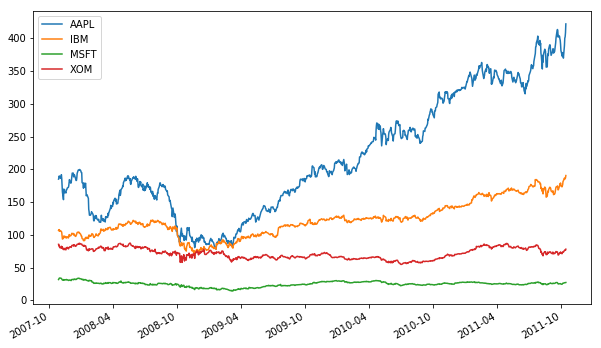

In [71]:
close_px[ ['AAPL', 'IBM', 'MSFT', 'XOM'] ].plot()

In [72]:
close_px.iloc[-1]

AA        10.26
AAPL     422.00
GE        16.60
IBM      190.53
JNJ       64.72
MSFT      27.27
PEP       62.24
SPX     1224.58
XOM       78.11
Name: 2011-10-14 00:00:00, dtype: float64

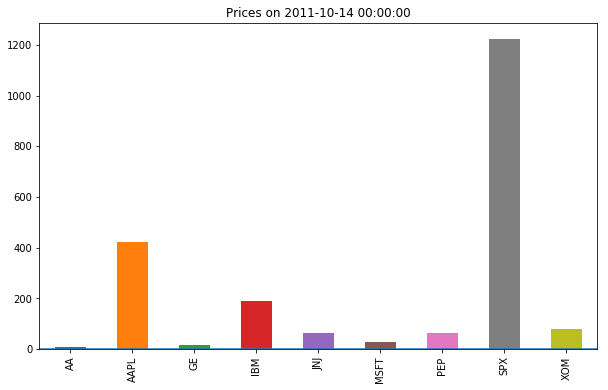

In [73]:
close_px.iloc[-1].plot(kind='bar')
plt.title('Prices on %s' % close_px.index[-1])
plt.axhline(0)

In [74]:
index = MultiIndex(levels=[ ['foo', 'bar', 'baz', 'qux'],
                            ['one', 'two', 'three'] ],
                   labels=[ [0,0,0,1,1,2,2,3,3,3,],
                            [0,1,2,0,1,1,2,0,1,2] ] )
hdf = DataFrame(np.random.randn(10, 3), index=index, columns=['A', 'B', 'C'])
hdf


A         B         C
foo one   -0.043486  0.640146 -0.888984
    two    1.042282  1.265002  1.000252
    three  0.251486  0.545957 -0.039871
bar one   -0.180241 -0.320736  0.845669
    two    0.285966  1.388832  0.596287
baz two    0.446242  1.554858  0.018774
    three  1.099445 -1.303206  0.122758
qux one   -0.820773  0.354006  0.606209
    two   -1.031531  0.173097 -1.108210
    three  1.940054  0.678353 -0.172149

In [75]:
names = read_csv('baby-names2.csv')
names

,year,name,prop,sex,soundex
0,1880,John,0.081541,boy,J500
1,1880,William,0.080511,boy,W450
2,1880,James,0.050057,boy,J520
3,1880,Charles,0.045167,boy,C642
4,1880,George,0.043292,boy,G620
5,1880,Frank,0.027380,boy,F652
6,1880,Joseph,0.022229,boy,J210
7,1880,Thomas,0.021401,boy,T520
8,1880,Henry,0.020641,boy,H560
9,1880,Robert,0.020404,boy,R163


In [76]:
names.head()

,year,name,prop,sex,soundex
0,1880,John,0.081541,boy,J500
1,1880,William,0.080511,boy,W450
2,1880,James,0.050057,boy,J520
3,1880,Charles,0.045167,boy,C642
4,1880,George,0.043292,boy,G620


In [77]:
names[ names.year == 1880 ].head()

,year,name,prop,sex,soundex
0,1880,John,0.081541,boy,J500
1,1880,William,0.080511,boy,W450
2,1880,James,0.050057,boy,J520
3,1880,Charles,0.045167,boy,C642
4,1880,George,0.043292,boy,G620


In [78]:
names[ names.year == 1880 ].tail()

,year,name,prop,sex,soundex
129995,1880,Emaline,0.000041,girl,E545
129996,1880,Ester,0.000041,girl,E236
129997,1880,Eulah,0.000041,girl,E400
129998,1880,Eulalie,0.000041,girl,E440
129999,1880,Euna,0.000041,girl,E500


In [79]:
boys = names[ names.sex == 'boy' ]
girls = names[ names.sex == 'girl']

In [80]:
boys.groupby('year')

In [81]:
boys.groupby('year').size()

year
1880    1000
1881    1000
1882    1000
1883    1000
1884    1000
1885    1000
1886    1000
1887    1000
1888    1000
1889    1000
1890    1000
1891    1000
1892    1000
1893    1000
1894    1000
1895    1000
1896    1000
1897    1000
1898    1000
1899    1000
1900    1000
1901    1000
1902    1000
1903    1000
1904    1000
1905    1000
1906    1000
1907    1000
1908    1000
1909    1000
        ... 
1979    1000
1980    1000
1981    1000
1982    1000
1983    1000
1984    1000
1985    1000
1986    1000
1987    1000
1988    1000
1989    1000
1990    1000
1991    1000
1992    1000
1993    1000
1994    1000
1995    1000
1996    1000
1997    1000
1998    1000
1999    1000
2000    1000
2001    1000
2002    1000
2003    1000
2004    1000
2005    1000
2006    1000
2007    1000
2008    1000
Length: 129, dtype: int64

In [82]:
names.groupby(['year', 'sex']).size()

year  sex 
1880  boy     1000
      girl    1000
1881  boy     1000
      girl    1000
1882  boy     1000
      girl    1000
1883  boy     1000
      girl    1000
1884  boy     1000
      girl    1000
1885  boy     1000
      girl    1000
1886  boy     1000
      girl    1000
1887  boy     1000
      girl    1000
1888  boy     1000
      girl    1000
1889  boy     1000
      girl    1000
1890  boy     1000
      girl    1000
1891  boy     1000
      girl    1000
1892  boy     1000
      girl    1000
1893  boy     1000
      girl    1000
1894  boy     1000
      girl    1000
              ... 
1994  boy     1000
      girl    1000
1995  boy     1000
      girl    1000
1996  boy     1000
      girl    1000
1997  boy     1000
      girl    1000
1998  boy     1000
      girl    1000
1999  boy     1000
      girl    1000
2000  boy     1000
      girl    1000
2001  boy     1000
      girl    1000
2002  boy     1000
      girl    1000
2003  boy     1000
      girl    1000
2004  boy     1000
 

In [83]:
type(names.groupby(['year', 'sex']).size())

pandas.core.series.Series

In [84]:
names.groupby(['year', 'sex']).size().loc[2000]

sex
boy     1000
girl    1000
dtype: int64

In [85]:
boys[ boys.year == 2000 ]

,year,name,prop,sex,soundex
120000,2000,Jacob,0.016514,boy,J210
120001,2000,Michael,0.015346,boy,M240
120002,2000,Matthew,0.013695,boy,M300
120003,2000,Joshua,0.013194,boy,J200
120004,2000,Christopher,0.011990,boy,C623
120005,2000,Nicholas,0.011815,boy,N242
120006,2000,Andrew,0.011324,boy,A536
120007,2000,Joseph,0.010930,boy,J210
120008,2000,Daniel,0.010681,boy,D540
120009,2000,Tyler,0.010305,boy,T460


In [86]:
boys[ boys.year == 2000 ].prop

120000    0.016514
120001    0.015346
120002    0.013695
120003    0.013194
120004    0.011990
120005    0.011815
120006    0.011324
120007    0.010930
120008    0.010681
120009    0.010305
120010    0.009896
120011    0.009745
120012    0.009715
120013    0.009617
120014    0.009516
120015    0.009454
120016    0.009416
120017    0.008613
120018    0.008520
120019    0.008282
120020    0.008085
120021    0.007693
120022    0.007643
120023    0.007378
120024    0.007298
120025    0.007108
120026    0.006836
120027    0.006780
120028    0.006577
120029    0.006241
            ...   
120970    0.000074
120971    0.000074
120972    0.000074
120973    0.000073
120974    0.000073
120975    0.000073
120976    0.000073
120977    0.000073
120978    0.000073
120979    0.000072
120980    0.000072
120981    0.000072
120982    0.000072
120983    0.000072
120984    0.000072
120985    0.000072
120986    0.000072
120987    0.000072
120988    0.000072
120989    0.000071
120990    0.000071
120991    0.

In [87]:
boys[ boys.year == 2000 ][:5]

,year,name,prop,sex,soundex
120000,2000,Jacob,0.016514,boy,J210
120001,2000,Michael,0.015346,boy,M240
120002,2000,Matthew,0.013695,boy,M300
120003,2000,Joshua,0.013194,boy,J200
120004,2000,Christopher,0.011990,boy,C623


In [88]:
boys[ boys.year == 2000 ].prop.idxmax()

120000

In [89]:
boys.loc[ boys [ boys.year == 2000 ].prop.idxmax() ]

year           2000
name          Jacob
prop       0.016514
sex             boy
soundex        J210
Name: 120000, dtype: object

In [90]:
def get_max_record(group):
    return group.loc[group.prop.idxmax()]

get_max_record(boys)

year           1880
name           John
prop       0.081541
sex             boy
soundex        J500
Name: 0, dtype: object

In [91]:
result = boys.groupby('year').apply(get_max_record)
result

,year,name,prop,sex,soundex
year,,,,,
1880,1880,John,0.081541,boy,J500
1881,1881,John,0.080975,boy,J500
1882,1882,John,0.078314,boy,J500
1883,1883,John,0.079066,boy,J500
1884,1884,John,0.076476,boy,J500
1885,1885,John,0.075517,boy,J500
1886,1886,John,0.075820,boy,J500
1887,1887,John,0.074181,boy,J500
1888,1888,John,0.071186,boy,J500


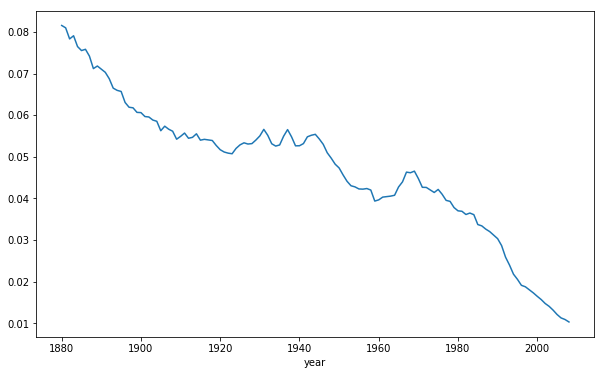

In [92]:
result.prop.plot()

In [93]:
travis = boys[ boys.name == 'Travis' ]
travis

,year,name,prop,sex,soundex
563,1880,Travis,0.000101,boy,T612
2648,1882,Travis,0.000082,boy,T612
3672,1883,Travis,0.000080,boy,T612
4656,1884,Travis,0.000081,boy,T612
5602,1885,Travis,0.000095,boy,T612
6598,1886,Travis,0.000092,boy,T612
9871,1889,Travis,0.000059,boy,T612
10733,1890,Travis,0.000075,boy,T612
11696,1891,Travis,0.000082,boy,T612
12593,1892,Travis,0.000099,boy,T612


In [94]:
idf = boys.set_index( ['name', 'year'] )
idf[-50:]

,,prop,sex,soundex
name,year,,,
Reilly,2008,0.000097,boy,R400
Sheldon,2008,0.000097,boy,S435
Abdullah,2008,0.000097,boy,A134
Jagger,2008,0.000097,boy,J260
Thaddeus,2008,0.000097,boy,T320
Case,2008,0.000096,boy,C200
Kyson,2008,0.000096,boy,K250
Lamont,2008,0.000096,boy,L553
Chaz,2008,0.000096,boy,C200


In [95]:
idf.loc['Travis']

,prop,sex,soundex
year,,,
1880,0.000101,boy,T612
1882,0.000082,boy,T612
1883,0.000080,boy,T612
1884,0.000081,boy,T612
1885,0.000095,boy,T612
1886,0.000092,boy,T612
1889,0.000059,boy,T612
1890,0.000075,boy,T612
1891,0.000082,boy,T612


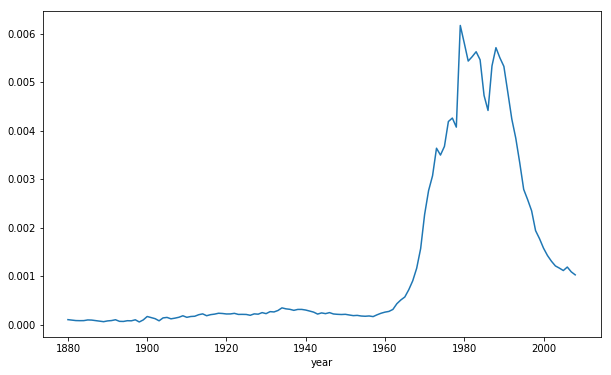

In [96]:
idf.loc['Travis'].prop.plot()

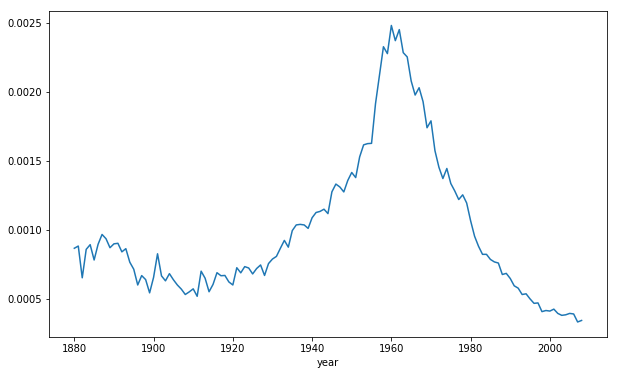

In [97]:
idf.loc['Jay'].prop.plot()

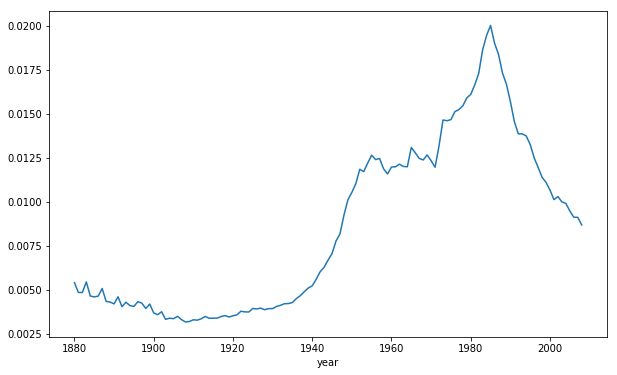

In [98]:
idf.loc['Daniel'].prop.plot()

In [99]:
boys.groupby('name')['prop'].mean()

name
Aaden        0.000442
Aarav        0.000101
Aaron        0.002266
Ab           0.000044
Abb          0.000046
Abbie        0.000046
Abbott       0.000044
Abdiel       0.000092
Abdul        0.000064
Abdullah     0.000094
Abe          0.000225
Abel         0.000152
Abelardo     0.000041
Abie         0.000042
Abner        0.000130
Abraham      0.000494
Abram        0.000105
Ace          0.000080
Acey         0.000042
Acie         0.000062
Acy          0.000046
Ada          0.000057
Adalberto    0.000051
Adam         0.002242
Adams        0.000053
Adan         0.000131
Add          0.000043
Addie        0.000065
Addison      0.000114
Adelard      0.000065
               ...   
Yoshio       0.000054
Young        0.000080
Yurem        0.000091
Yusuf        0.000096
Zachariah    0.000275
Zachary      0.003748
Zachery      0.000369
Zack         0.000113
Zackary      0.000373
Zackery      0.000232
Zaid         0.000086
Zaiden       0.000106
Zain         0.000100
Zaire        0.000100
Zakar

In [100]:
boys.groupby('name')['prop'].mean().sort_values()

name
Kennard        0.000027
Danniel        0.000027
Deryl          0.000028
Grayling       0.000028
Michial        0.000028
Cheryl         0.000028
Dwyane         0.000028
Levern         0.000029
Theodis        0.000029
Randolf        0.000029
Diane          0.000029
Renard         0.000029
Kimball        0.000029
Patric         0.000029
Lex            0.000030
Dann           0.000030
Erasmo         0.000030
Darryll        0.000030
Garey          0.000030
Rudolfo        0.000030
Michal         0.000031
Lyn            0.000031
Brenda         0.000031
Mikeal         0.000031
Desi           0.000031
Kem            0.000031
Kathleen       0.000031
Terance        0.000031
Cynthia        0.000031
Linden         0.000031
                 ...   
Arthur         0.005845
Brandon        0.005951
Andrew         0.006088
Harry          0.006162
Matthew        0.006178
Anthony        0.006315
Kenneth        0.006470
Kevin          0.006589
Ryan           0.006682
Jeffrey        0.006701
Walter     

In [101]:
boys['prop'].describe()

count    129000.000000
mean          0.000916
std           0.003441
min           0.000026
25%           0.000071
50%           0.000142
75%           0.000453
max           0.081541
Name: prop, dtype: float64

In [102]:
result = boys.groupby('year')['prop'].describe()
result[:50]

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
1880,1000.0,0.000931,0.004871,0.000042,0.000059,0.000118,0.000372,0.081541
1881,1000.0,0.000930,0.004812,0.000037,0.000065,0.000120,0.000369,0.080975
1882,1000.0,0.000928,0.004691,0.000041,0.000066,0.000115,0.000377,0.078314
1883,1000.0,0.000929,0.004675,0.000044,0.000062,0.000116,0.000382,0.079066
1884,1000.0,0.000927,0.004542,0.000041,0.000065,0.000122,0.000385,0.076476
1885,1000.0,0.000926,0.004459,0.000043,0.000069,0.000121,0.000373,0.075517
1886,1000.0,0.000926,0.004447,0.000042,0.000067,0.000118,0.000397,0.075820
1887,1000.0,0.000925,0.004380,0.000046,0.000073,0.000119,0.000366,0.074181
1888,1000.0,0.000923,0.004294,0.000046,0.000069,0.000123,0.000379,0.071186


In [103]:
df = boys[ boys.year == 2008 ]

In [104]:
df.prop

128000    0.010355
128001    0.009437
128002    0.009301
128003    0.008799
128004    0.008702
128005    0.008566
128006    0.008442
128007    0.008438
128008    0.008268
128009    0.008061
128010    0.007877
128011    0.007694
128012    0.007570
128013    0.007467
128014    0.007262
128015    0.007165
128016    0.006952
128017    0.006754
128018    0.006372
128019    0.006102
128020    0.006085
128021    0.006042
128022    0.005985
128023    0.005974
128024    0.005930
128025    0.005905
128026    0.005838
128027    0.005829
128028    0.005752
128029    0.005414
            ...   
128970    0.000094
128971    0.000094
128972    0.000094
128973    0.000094
128974    0.000094
128975    0.000094
128976    0.000094
128977    0.000093
128978    0.000093
128979    0.000093
128980    0.000093
128981    0.000093
128982    0.000093
128983    0.000092
128984    0.000092
128985    0.000092
128986    0.000091
128987    0.000091
128988    0.000091
128989    0.000091
128990    0.000090
128991    0.

In [105]:
df = boys[ boys.year == 2008 ].sort_values(by='prop', ascending=False)

In [106]:
df.prop

128000    0.010355
128001    0.009437
128002    0.009301
128003    0.008799
128004    0.008702
128005    0.008566
128006    0.008442
128007    0.008438
128008    0.008268
128009    0.008061
128010    0.007877
128011    0.007694
128012    0.007570
128013    0.007467
128014    0.007262
128015    0.007165
128016    0.006952
128017    0.006754
128018    0.006372
128019    0.006102
128020    0.006085
128021    0.006042
128022    0.005985
128023    0.005974
128024    0.005930
128025    0.005905
128026    0.005838
128027    0.005829
128028    0.005752
128029    0.005414
            ...   
128975    0.000094
128974    0.000094
128969    0.000094
128972    0.000094
128970    0.000094
128968    0.000094
128971    0.000094
128977    0.000093
128978    0.000093
128979    0.000093
128980    0.000093
128981    0.000093
128982    0.000093
128983    0.000092
128984    0.000092
128985    0.000092
128988    0.000091
128989    0.000091
128986    0.000091
128987    0.000091
128990    0.000090
128991    0.

In [107]:
df.prop.cumsum()

128000    0.010355
128001    0.019792
128002    0.029093
128003    0.037892
128004    0.046594
128005    0.055160
128006    0.063602
128007    0.072040
128008    0.080308
128009    0.088369
128010    0.096246
128011    0.103940
128012    0.111510
128013    0.118977
128014    0.126239
128015    0.133404
128016    0.140356
128017    0.147110
128018    0.153482
128019    0.159584
128020    0.165669
128021    0.171711
128022    0.177696
128023    0.183670
128024    0.189600
128025    0.195505
128026    0.201343
128027    0.207172
128028    0.212924
128029    0.218338
            ...   
128975    0.792756
128974    0.792850
128969    0.792944
128972    0.793038
128970    0.793132
128968    0.793226
128971    0.793320
128977    0.793413
128978    0.793506
128979    0.793599
128980    0.793692
128981    0.793785
128982    0.793878
128983    0.793970
128984    0.794062
128985    0.794154
128988    0.794245
128989    0.794336
128986    0.794427
128987    0.794518
128990    0.794608
128991    0.

In [108]:
df.prop.cumsum().searchsorted(0.5)

array([127])

In [109]:
df.prop.cumsum()[:130]

128000    0.010355
128001    0.019792
128002    0.029093
128003    0.037892
128004    0.046594
128005    0.055160
128006    0.063602
128007    0.072040
128008    0.080308
128009    0.088369
128010    0.096246
128011    0.103940
128012    0.111510
128013    0.118977
128014    0.126239
128015    0.133404
128016    0.140356
128017    0.147110
128018    0.153482
128019    0.159584
128020    0.165669
128021    0.171711
128022    0.177696
128023    0.183670
128024    0.189600
128025    0.195505
128026    0.201343
128027    0.207172
128028    0.212924
128029    0.218338
            ...   
128100    0.454156
128101    0.456166
128102    0.458152
128103    0.460093
128104    0.462009
128105    0.463904
128106    0.465773
128107    0.467637
128108    0.469478
128109    0.471285
128110    0.473029
128111    0.474770
128112    0.476492
128113    0.478208
128114    0.479911
128115    0.481593
128116    0.483275
128117    0.484921
128118    0.486563
128119    0.488203
128120    0.489818
128121    0.

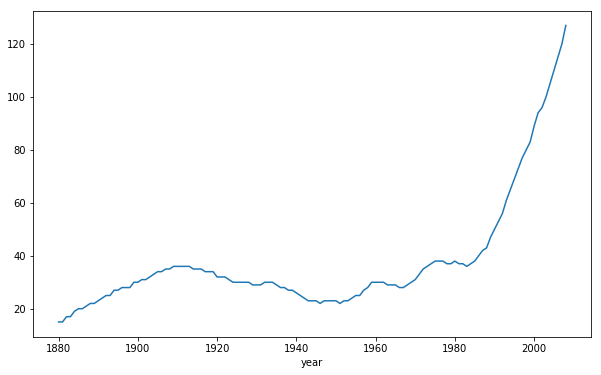

In [110]:
def get_quantile_count(group, quantile=0.5):
    df = group.sort_values(by='prop', ascending=False)
    return df.prop.cumsum().searchsorted(quantile)

boys.groupby('year').apply(get_quantile_count).astype(float).plot()

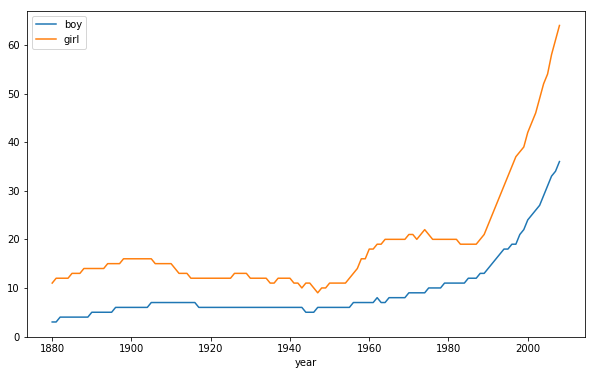

In [111]:
q = 0.25
boy_ct = boys.groupby('year').apply(get_quantile_count, quantile=q)
girl_ct = girls.groupby('year').apply(get_quantile_count, quantile=q)
boy_ct.astype(float).plot(label='boy')
girl_ct.astype(float).plot(label='girl')
plt.legend(loc='best')

In [112]:
boys[ boys.year == 2008 ].prop.rank()

128000    1000.0
128001     999.0
128002     998.0
128003     997.0
128004     996.0
128005     995.0
128006     994.0
128007     993.0
128008     992.0
128009     991.0
128010     990.0
128011     989.0
128012     988.0
128013     987.0
128014     986.0
128015     985.0
128016     984.0
128017     983.0
128018     982.0
128019     981.0
128020     980.0
128021     979.0
128022     978.0
128023     977.0
128024     976.0
128025     975.0
128026     974.0
128027     973.0
128028     972.0
128029     971.0
           ...  
128970      28.0
128971      28.0
128972      28.0
128973      28.0
128974      28.0
128975      28.0
128976      28.0
128977      20.5
128978      20.5
128979      20.5
128980      20.5
128981      20.5
128982      20.5
128983      16.0
128984      16.0
128985      16.0
128986      12.5
128987      12.5
128988      12.5
128989      12.5
128990       7.5
128991       7.5
128992       7.5
128993       7.5
128994       7.5
128995       7.5
128996       2.5
128997       2

In [113]:
grouped = boys.groupby('year')['prop']
grouped.transform(Series.rank)

0         1000.0
1          999.0
2          998.0
3          997.0
4          996.0
5          995.0
6          994.0
7          993.0
8          992.0
9          991.0
10         990.0
11         989.0
12         988.0
13         987.0
14         986.0
15         985.0
16         984.0
17         983.0
18         982.0
19         981.0
20         979.5
21         979.5
22         978.0
23         977.0
24         976.0
25         975.0
26         974.0
27         973.0
28         972.0
29         971.0
           ...  
128970      28.0
128971      28.0
128972      28.0
128973      28.0
128974      28.0
128975      28.0
128976      28.0
128977      20.5
128978      20.5
128979      20.5
128980      20.5
128981      20.5
128982      20.5
128983      16.0
128984      16.0
128985      16.0
128986      12.5
128987      12.5
128988      12.5
128989      12.5
128990       7.5
128991       7.5
128992       7.5
128993       7.5
128994       7.5
128995       7.5
128996       2.5
128997       2

In [114]:
boys['year_rank'] = grouped.transform(Series.rank)

/home/jayckaiser/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


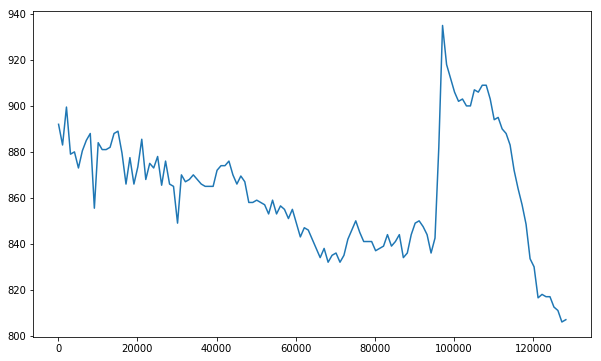

In [115]:
boys[ boys.name == 'Wesley' ].year_rank.plot()

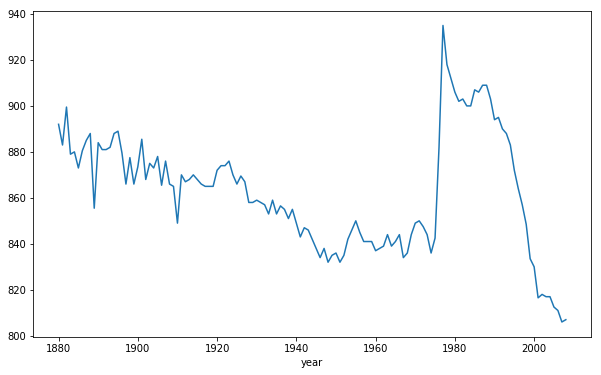

In [116]:
idf = boys.set_index( ['name', 'year'])
idf.loc['Wesley'].year_rank.plot()

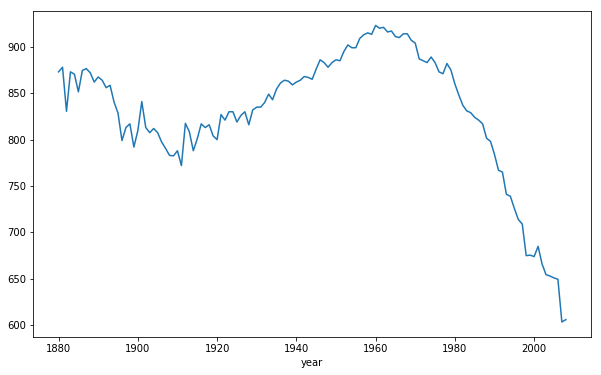

In [117]:
def getNameRank(name, sex='boy'):
    if sex == 'girl':
        idf = girls.set_index( ['name', 'year'] )
    else:
        idf = boys.set_index( ['name', 'year'] )
    
    try:
        idf.loc[name].year_rank.plot()
    except KeyError:
        print("%s has never been in the top 1000 for %ss." % (name, sex))
    
getNameRank('Jay')

In [118]:
%timeit result = grouped.transform(lambda x: x - x.mean())

10 loops, best of 3: 35.4 ms per loop


In [119]:
%timeit result = grouped.apply(lambda x: x - x.mean())

10 loops, best of 3: 26.4 ms per loop


In [120]:
names

,year,name,prop,sex,soundex
0,1880,John,0.081541,boy,J500
1,1880,William,0.080511,boy,W450
2,1880,James,0.050057,boy,J520
3,1880,Charles,0.045167,boy,C642
4,1880,George,0.043292,boy,G620
5,1880,Frank,0.027380,boy,F652
6,1880,Joseph,0.022229,boy,J210
7,1880,Thomas,0.021401,boy,T520
8,1880,Henry,0.020641,boy,H560
9,1880,Robert,0.020404,boy,R163


In [121]:
births = read_csv("births.csv")

In [122]:
merged = merge(names, births, on=['year', 'sex'])

In [123]:
merge(names, births)

,year,name,prop,sex,soundex,births
0,1880,John,0.081541,boy,J500,118405
1,1880,William,0.080511,boy,W450,118405
2,1880,James,0.050057,boy,J520,118405
3,1880,Charles,0.045167,boy,C642,118405
4,1880,George,0.043292,boy,G620,118405
5,1880,Frank,0.027380,boy,F652,118405
6,1880,Joseph,0.022229,boy,J210,118405
7,1880,Thomas,0.021401,boy,T520,118405
8,1880,Henry,0.020641,boy,H560,118405
9,1880,Robert,0.020404,boy,R163,118405


In [124]:
merged['persons'] = np.floor(merged.prop * merged.births)
merged.head()

,year,name,prop,sex,soundex,births,persons
0,1880,John,0.081541,boy,J500,118405,9654.0
1,1880,William,0.080511,boy,W450,118405,9532.0
2,1880,James,0.050057,boy,J520,118405,5926.0
3,1880,Charles,0.045167,boy,C642,118405,5347.0
4,1880,George,0.043292,boy,G620,118405,5125.0


In [125]:
merged.tail()

,year,name,prop,sex,soundex,births,persons
257995,2008,Carleigh,0.000128,girl,C642,2072756,265.0
257996,2008,Iyana,0.000128,girl,I500,2072756,265.0
257997,2008,Kenley,0.000127,girl,K540,2072756,263.0
257998,2008,Sloane,0.000127,girl,S450,2072756,263.0
257999,2008,Elianna,0.000127,girl,E450,2072756,263.0


In [126]:
merged.groupby( ['name', 'sex'] )['persons'].sum()

name      sex 
Aaden     boy        959.0
Aaliyah   girl     39660.0
Aarav     boy        219.0
Aaron     boy     508034.0
          girl      1365.0
Ab        boy         24.0
Abagail   girl      2680.0
Abb       boy         15.0
Abbey     girl     14333.0
Abbie     boy         10.0
          girl     16556.0
Abbigail  girl      6792.0
Abbott    boy          9.0
Abby      girl     47845.0
Abdiel    boy        199.0
Abdul     boy       2609.0
Abdullah  boy       2352.0
Abe       boy       6835.0
Abel      boy      30752.0
Abelardo  boy         68.0
Abie      boy          4.0
Abigail   girl    240993.0
Abigale   girl      2429.0
Abigayle  girl      3510.0
Abner     boy       2304.0
Abraham   boy      68620.0
Abram     boy       8148.0
Abril     girl      3660.0
Ace       boy        935.0
Acey      boy          4.0
                    ...   
Zelda     girl     10001.0
Zelia     girl        77.0
Zella     girl      9951.0
Zelma     girl     15513.0
Zelpha    girl        88.0
Zena      gir

In [127]:
merged.groupby( ['name', 'sex'] )['persons'].sum().sort_values()

name         sex 
Alabama      girl          3.0
Daisye       girl          3.0
Crissie      girl          3.0
Dollye       girl          3.0
Dema         girl          3.0
Chestina     girl          3.0
Ala          girl          3.0
Clem         girl          3.0
Chester      girl          3.0
Eithel       girl          3.0
Amey         girl          3.0
Achsah       girl          3.0
Alfred       girl          3.0
Esequiel     boy           4.0
Amil         boy           4.0
Francina     girl          4.0
Lovisa       girl          4.0
Nolie        girl          4.0
Hunt         boy           4.0
Claiborne    boy           4.0
Cilla        girl          4.0
Lovie        boy           4.0
Primus       boy           4.0
Prosper      boy           4.0
Hays         boy           4.0
Lucina       girl          4.0
Grove        boy           4.0
Calhoun      boy           4.0
Pryor        boy           4.0
Affie        girl          4.0
                       ...    
Brian        boy     

In [128]:
mboys = merge(boys, births)

In [129]:
mboys['persons'] = np.floor(mboys.prop * mboys.births)

In [130]:
persons = mboys.set_index( ['year', 'name'] ).persons

In [131]:
type(persons)

pandas.core.series.Series

In [132]:
persons

year  name     
1880  John         9654.0
      William      9532.0
      James        5926.0
      Charles      5347.0
      George       5125.0
      Frank        3241.0
      Joseph       2632.0
      Thomas       2533.0
      Henry        2443.0
      Robert       2415.0
      Edward       2363.0
      Harry        2152.0
      Walter       1754.0
      Arthur       1598.0
      Fred         1568.0
      Albert       1492.0
      Samuel       1023.0
      David         868.0
      Louis         828.0
      Joe           731.0
      Charlie       729.0
      Clarence      729.0
      Richard       727.0
      Andrew        644.0
      Daniel        642.0
      Ernest        614.0
      Will          587.0
      Jesse         568.0
      Oscar         543.0
      Lewis         516.0
                    ...  
2008  Landin        203.0
      Reagan        203.0
      Turner        203.0
      Arnav         203.0
      Brenton       203.0
      Callum        203.0
      Jayvion       20

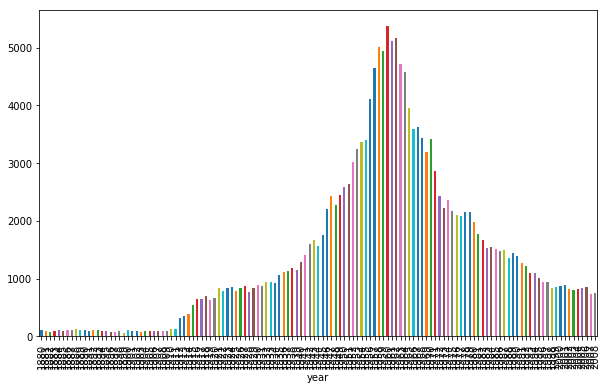

In [133]:
persons.loc[:, 'Jay'].plot(kind='bar', rot=90)

In [134]:
persons.unstack('name')

name,Aaden,Aarav,Aaron,Ab,Abb,Abbie,Abbott,Abdiel,Abdul,Abdullah,...,Zeb,Zebulon,Zechariah,Zed,Zeke,Zenas,Zeno,Zigmund,Zion,Zollie
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,101.0,4.0,NaN,NaN,4.0,NaN,NaN,NaN,...,9.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN
1881,NaN,NaN,93.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1882,NaN,NaN,85.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1883,NaN,NaN,104.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.0,NaN,NaN,NaN,5.0,NaN,5.0,NaN,NaN,NaN
1884,NaN,NaN,96.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1885,NaN,NaN,88.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,6.0
1886,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1887,NaN,NaN,78.0,5.0,NaN,5.0,NaN,NaN,NaN,NaN,...,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1888,NaN,NaN,90.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0


In [135]:
result = _

In [136]:
result['Jay']

year
1880     103.0
1881      95.0
1882      80.0
1883      96.0
1884     109.0
1885      91.0
1886     107.0
1887     106.0
1888     121.0
1889     104.0
1890     107.0
1891      99.0
1892     110.0
1893     104.0
1894      96.0
1895      90.0
1896      77.0
1897      81.0
1898      84.0
1899      63.0
1900     106.0
1901      95.0
1902      88.0
1903      81.0
1904      95.0
1905      91.0
1906      87.0
1907      91.0
1908      89.0
1909      97.0
         ...  
1979    2144.0
1980    1980.0
1981    1780.0
1982    1666.0
1983    1537.0
1984    1547.0
1985    1516.0
1986    1479.0
1987    1486.0
1988    1359.0
1989    1441.0
1990    1399.0
1991    1266.0
1992    1218.0
1993    1104.0
1994    1099.0
1995    1010.0
1996     943.0
1997     946.0
1998     832.0
1999     853.0
2000     865.0
2001     886.0
2002     821.0
2003     805.0
2004     818.0
2005     844.0
2006     861.0
2007     741.0
2008     752.0
Name: Jay, Length: 129, dtype: float64

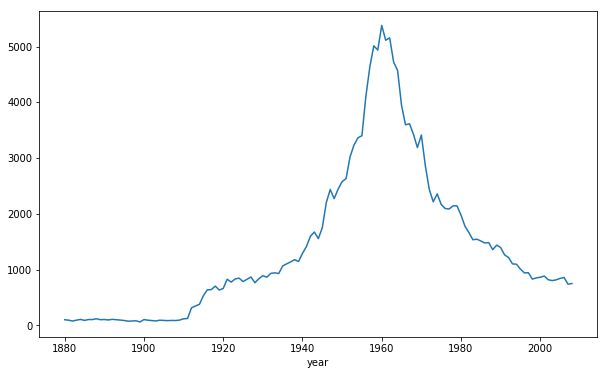

In [137]:
result['Jay'].plot()